<a href="https://colab.research.google.com/github/AnnLivio/EDA_on_retail_data/blob/main/online_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Online Retail Exploratory Data Analysis with Python

## Case Study
In this project, we will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps.

By conducting exploratory data analysis, we will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, we will uncover key trends, such as the busiest sales months, best-selling products, popular products and the store's most valuable customers.

Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.


## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`.

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Imports

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load data
path = "Online_Retail.xlsx"
df = pd.read_excel(path)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#Some Statistics
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## Perform data cleaning


### Primeras observaciones

1. Hay 541909 registros y 8 columnas.
2.
   + 4 columnas categóricas
   + 2 de tipo float
   + 1 Datetime
   + 1 integer
3. Faltan datos en `Description`, `CustomerID`
4. Quantity y UnitPrice tienen valores negativos

In [ ]:
#Count the null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Valores negativos o 0 en UnitPrice
Son valores inesperados para esta variable, con lo cual los observaremos más en detalle para encontrar la razón.

In [ ]:
mask = (df['UnitPrice']<0)
df[mask].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
df[df['Description']=='Adjust bad debt']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
#Drop Adjust bad debt
df = df[df['Description'] != 'Adjust bad debt']

In [ ]:
df[df['UnitPrice']==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2515 entries, 622 to 538919
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    2515 non-null   object        
 1   StockCode    2515 non-null   object        
 2   Description  1061 non-null   object        
 3   Quantity     2515 non-null   int64         
 4   InvoiceDate  2515 non-null   datetime64[ns]
 5   UnitPrice    2515 non-null   float64       
 6   CustomerID   40 non-null     float64       
 7   Country      2515 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 176.8+ KB


In [ ]:
#Drop UnitPrice = 0
df = df[df['UnitPrice']!=0]

### Evaluar registros que no son productos en STOCK CODE


In [ ]:
mask = (df['UnitPrice']>500)
df[mask]['Description'].unique()

array(['DOTCOM POSTAGE', 'Manual', 'AMAZON FEE', 'Bank Charges',
       'Discount', 'POSTAGE', 'PICNIC BASKET WICKER 60 PIECES', 'SAMPLES',
       'CRUK Commission'], dtype=object)

In [ ]:
df[df['UnitPrice']>500]['StockCode'].unique()

array(['DOT', 'M', 'AMAZONFEE', 'BANK CHARGES', 'D', 'POST', 22502, 'S',
       'B', 'CRUK'], dtype=object)

Dentro de los `UnitPrice` con valores más altos, encontramos descripciones que no corresponden a productos y su `StockCode` también lo confirma. Los analizaremos brevemente para proceder o no a su eliminación.

In [ ]:
#Create a list with extras that seems no products
extras = ['AMAZON FEE', 'Bank Charges','DOTCOM POSTAGE', 'Manual', 'Discount', \
          'POSTAGE', 'SAMPLES','CRUK Commission']

In [ ]:
print("Amazon FEE: ", df[df['StockCode'] == 'AMAZONFEE']['Country'].value_counts())

print("Bank Charges: ", df[df['StockCode'] == 'BANK CHARGES']['Country'].value_counts())

print("Bank Charges: ", df[df['StockCode'] == 'CRUK']['Country'].value_counts())

Amazon FEE:  United Kingdom    34
Name: Country, dtype: int64
Bank Charges:  United Kingdom    37
Name: Country, dtype: int64
Bank Charges:  United Kingdom    16
Name: Country, dtype: int64


In [ ]:
df[df['StockCode'] == 'AMAZONFEE'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14514,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom


In [ ]:
df[df['StockCode'] == 'BANK CHARGES'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4406,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823.0,United Kingdom
14435,C537572,BANK CHARGES,Bank Charges,-1,2010-12-07 12:00:00,95.38,NaN,United Kingdom
28992,C538680,BANK CHARGES,Bank Charges,-1,2010-12-13 17:10:00,966.92,NaN,United Kingdom
62508,541505,BANK CHARGES,Bank Charges,1,2011-01-18 15:58:00,15.00,15939.0,United Kingdom
64573,C541653,BANK CHARGES,Bank Charges,-1,2011-01-20 11:50:00,1050.15,NaN,United Kingdom


In [ ]:
df[df['StockCode'] == 'CRUK'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
317508,C564763,CRUK,CRUK Commission,-1,2011-08-30 10:49:00,1.60,14096.0,United Kingdom
324023,C565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096.0,United Kingdom
333779,C566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096.0,United Kingdom
338848,C566565,CRUK,CRUK Commission,-1,2011-09-13 12:32:00,52.24,14096.0,United Kingdom
351003,C567655,CRUK,CRUK Commission,-1,2011-09-21 14:40:00,608.66,14096.0,United Kingdom


Ambos datos sólo figuran para `United Kingdom`, son 34 en el caso de AMAZON FEE y 37 de BANK CHARGES, no corresponden a ventas ni devoluciones y los mantendremos al margen del análisis.

In [ ]:
#About SAMPLES
df[df['Description']=='SAMPLES']['CustomerID'].unique()

array([nan])

In [ ]:
#About Description
df[df['Description']=='Discount'].sort_values('UnitPrice').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
108088,C545478,D,Discount,-720,2011-03-03 11:08:00,0.01,16422.0,United Kingdom
182729,C552569,D,Discount,-240,2011-05-10 12:06:00,0.03,12901.0,United Kingdom
196362,C553841,D,Discount,-48,2011-05-19 12:19:00,0.20,16029.0,United Kingdom
226396,C556796,D,Discount,-96,2011-06-14 14:40:00,0.70,16013.0,United Kingdom
183138,C552650,D,Discount,-18,2011-05-10 14:03:00,1.45,16672.0,United Kingdom


In [ ]:
df[df['Description'].isin(extras)].groupby('Description')['Country'].value_counts()

Description      Country             
AMAZON FEE       United Kingdom           34
Bank Charges     United Kingdom           37
CRUK Commission  United Kingdom           16
DOTCOM POSTAGE   United Kingdom          707
Discount         United Kingdom           74
                 EIRE                      1
                 Italy                     1
                 Netherlands               1
Manual           United Kingdom          476
                 Germany                  15
                 Portugal                 14
                 Singapore                14
                 EIRE                     12
                 France                    9
                 Hong Kong                 6
                 Norway                    6
                 Japan                     3
                 Spain                     3
                 Channel Islands           2
                 Cyprus                    2
                 Finland                   1
                 

### Eliminación de datos que no corresponden a productos

In [ ]:
#Drop extras from df
df = df[~(df['Description'].isin(extras))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536639 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536639 non-null  object        
 1   StockCode    536639 non-null  object        
 2   Description  536639 non-null  object        
 3   Quantity     536639 non-null  int64         
 4   InvoiceDate  536639 non-null  datetime64[ns]
 5   UnitPrice    536639 non-null  float64       
 6   CustomerID   405013 non-null  float64       
 7   Country      536639 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


### Valores negativos en Quantity
Estos valores podrían corresponder a descuentos o devoluciones. Sería una pregunta para hacer a los responsables de los datos aunque, al no poder proceder con este intercambio de información, intentaré hacer hablar a los datos.

In [ ]:
df3 = pd.concat([df[df['Quantity']==df['Quantity'].max()], df[df['Quantity']==df['Quantity'].min()]])
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


Con esto comprobamos que los valores negativos corresponden a devoluciones o descuentos, las `Invoice` llevan un prefijo 'C' cuando se trata una devolución mientras que las compras no llevan prefijo.

In [ ]:
#Count return and discounts
df[df['InvoiceNo'].str[0]=='C'].describe()

,Quantity,UnitPrice,CustomerID
count,8706.000000,8706.000000,8540.000000
mean,-31.246497,4.420997,14996.510656
std,1183.307228,9.128259,1704.268454
min,-80995.000000,0.030000,12346.000000
25%,-6.000000,1.450000,13534.000000
50%,-2.000000,2.550000,14903.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,295.000000,18282.000000


### Columnas: Month, Year, WeekDay, SubTotal

In [ ]:
#Create column Month
df['Month'] = df['InvoiceDate'].dt.month

#Create column Year
df['Year'] = df['InvoiceDate'].dt.year

#Create column quarter of year
df['Quarter'] = df['InvoiceDate'].dt.quarter

#Create column for Week Day by number Monday=0, Sunday=6
df['WeekDay'] = df['InvoiceDate'].dt.weekday

In [ ]:
#Create column SubTotal
df['SubTotal'] = df['Quantity'] * df['UnitPrice']

## Explore the basic statistics of the dataset
including measures of central tendency and dispersion.


In [ ]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Quarter,WeekDay,SubTotal
count,536639.0,536639,536639,536639.000000,536639,536639.000000,405013.000000,536639,536639.000000,536639.000000,536639.000000,536639.000000,536639.000000
unique,23198.0,3928,4033,NaN,21311,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN
freq,1113.0,2307,2365,NaN,1113,NaN,NaN,491431,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.886061,NaN,3.297442,15295.017755,NaN,7.558558,2010.921689,2.836499,2.434471,18.262520
std,NaN,NaN,NaN,215.925492,NaN,4.565467,1710.211905,NaN,3.508899,0.268661,1.137102,1.847292,367.889413
min,NaN,NaN,NaN,-80995.000000,NaN,0.001000,12346.000000,NaN,1.000000,2010.000000,1.000000,0.000000,-168469.600000
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13969.000000,NaN,5.000000,2011.000000,2.000000,1.000000,3.750000


In [ ]:
# Convert relevant columns to numeric types before calculating quantiles
for column in ['Quantity', 'UnitPrice', 'SubTotal']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

cols = ['Quantity', 'UnitPrice', 'SubTotal']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

print("IQR")
print(IQR)

IQR
Quantity      9.00
UnitPrice     2.88
SubTotal     13.65
dtype: float64


### Observaciones

+ Hay datos de 38 paises y el más frecuente es United Kingdom
+ Se observan outliers en UnitPrice y Quantity
+ Sólo se tienen registros de 6 días de la semana

## Perform data visualization to gain insights into the dataset.
Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='UnitPrice'>

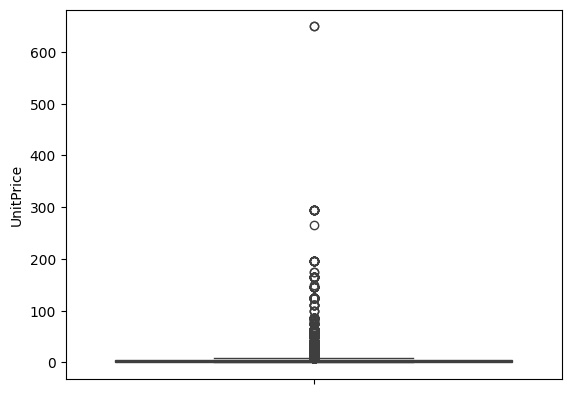

In [ ]:
sns.boxplot(df['UnitPrice'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Quantity'>

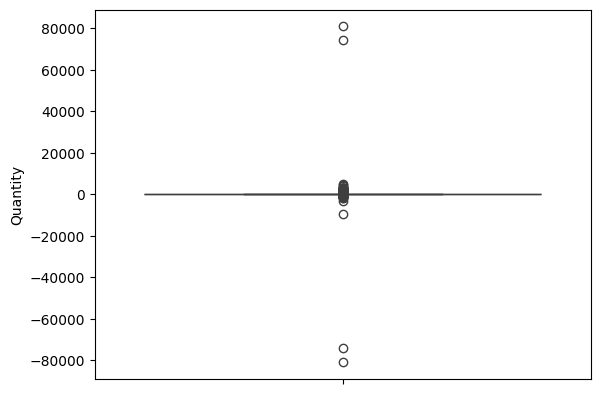

In [ ]:
sns.boxplot(df['Quantity'])

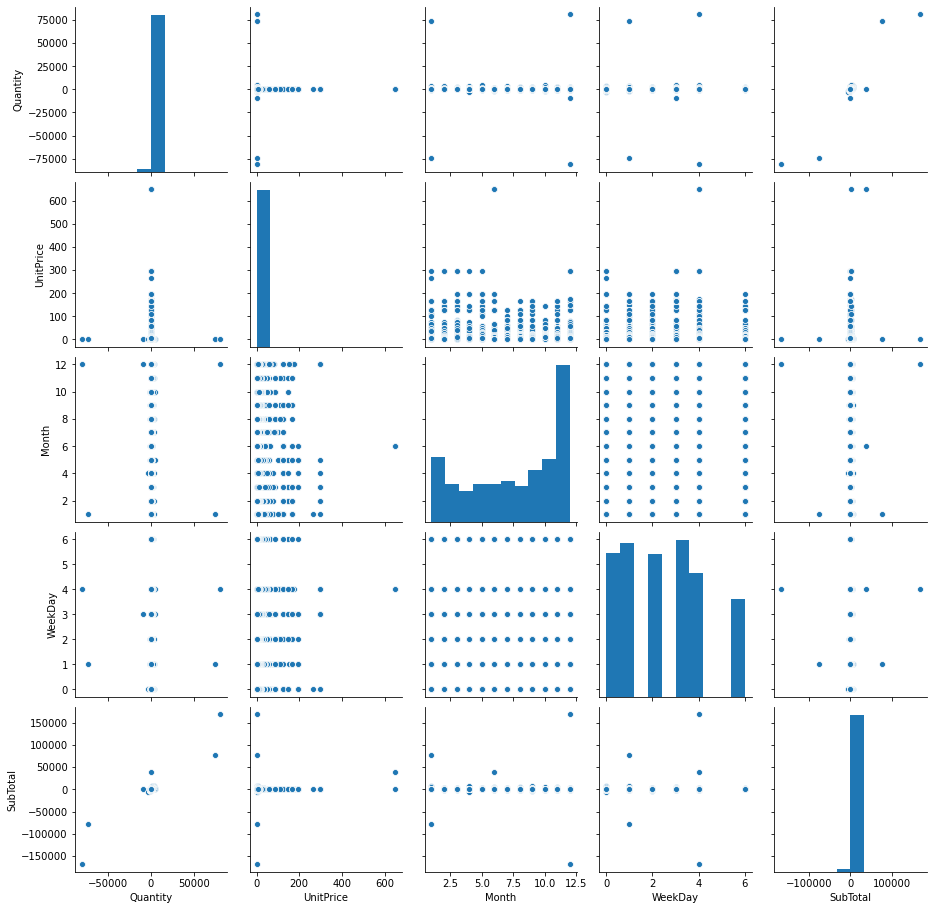

In [ ]:
# Create a pairplot of the data.

# 1. Select the columns
# 2. Create a pairplot for this columns only
cols = ['Quantity', 'UnitPrice', 'Month', 'WeekDay', 'Country', 'SubTotal']
sns.pairplot(df[cols]);

### Visualización de ventas de 2011

Los registros sólo poseen datos de Diciembre de 2010 no se podrían compara ambos años, representaremos sólo los datos de 2011 que están completos. Luego podríamos comprar Diciembre de 2010 y Diciembre de 2011.

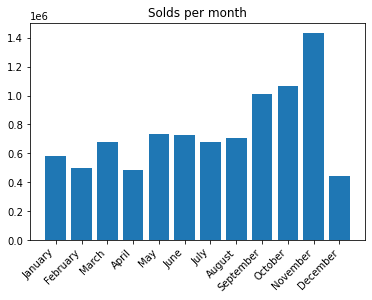

In [ ]:
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November",
               "December"]

results = df[df['Year']==2011].groupby('Month').sum()
plt.bar(month_order, results['SubTotal'])

plt.title('Solds per month')

plt.xticks(rotation=45, horizontalalignment='right')

plt.show()


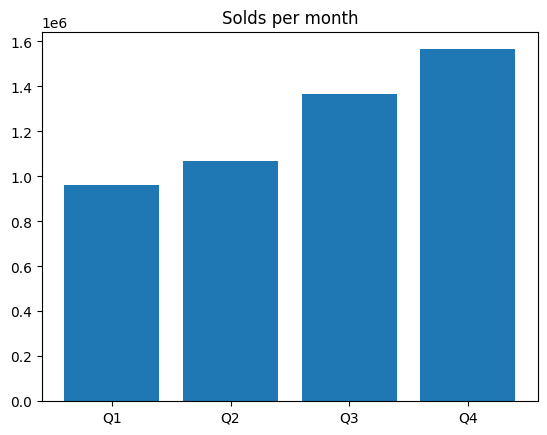

In [ ]:

results = df.query('Year == 2011').groupby('Quarter')['Quantity'].sum().reset_index()
plt.bar([1,2,3,4], results['Quantity'])

plt.title('Solds per month')

plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4'])

plt.show()

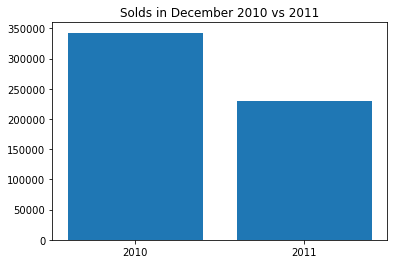

In [ ]:
bins = [2010, 2011]

results = df[df['Month']==12].groupby('Year').sum()
plt.bar(bins, results['Quantity'])

plt.xticks(bins)
plt.title('Solds in December 2010 vs 2011')

plt.show()

### Sales per Country

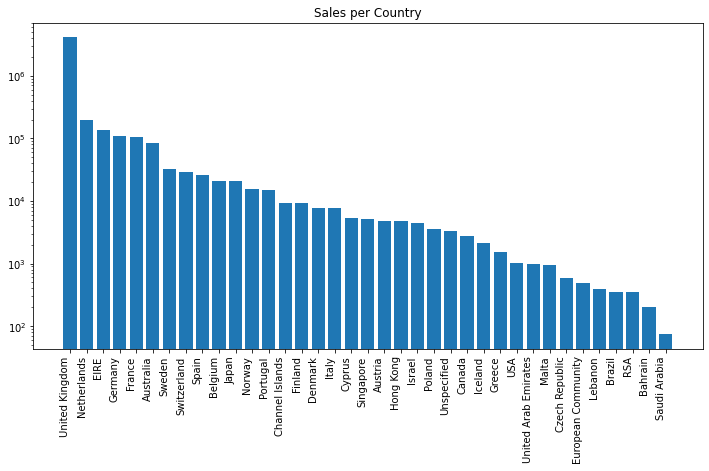

In [ ]:
#Sales per Country 2011
results = df[df['Year']==2011].groupby('Country').sum().sort_values('Quantity', ascending=False)

#Exclude United Kingdom
#results = results.iloc[1:30,]

countries = [i for i in results.index]

plt.figure(figsize=(12,6))
plt.bar(countries, results['Quantity'])

plt.title('Sales per Country')

plt.xticks(rotation='vertical', horizontalalignment='right')

plt.yscale('log')

plt.show()

### Devoluciones por País (top 10)

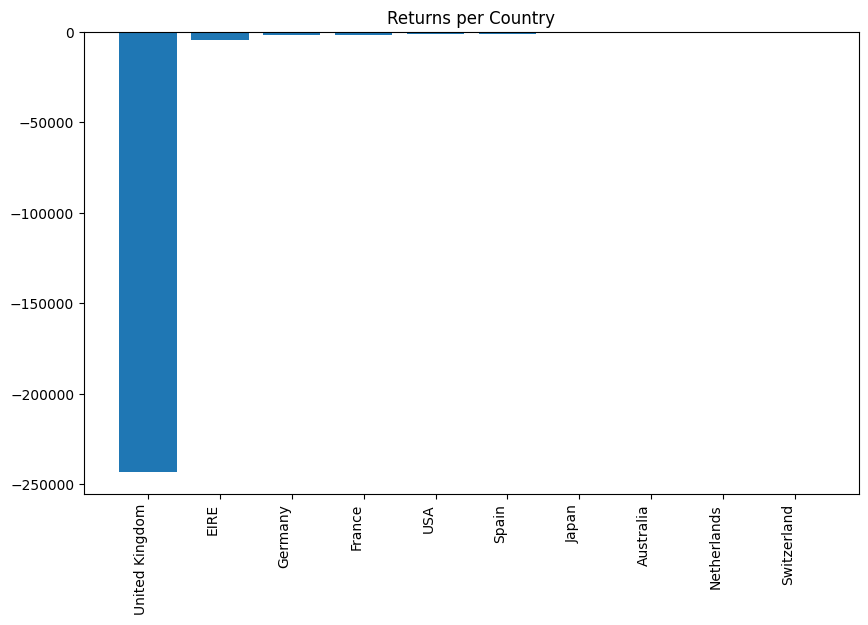

In [ ]:
#Returns per Country 2011
results = df.query('Year == 2011 and Quantity <0').groupby('Country')['Quantity'].sum().reset_index().sort_values('Quantity')

#Select the top 10
results = results.iloc[0:10,]

plt.figure(figsize=(10,6))
plt.bar(results['Country'], results['Quantity'])

plt.title('Returns per Country')
plt.xticks(rotation='vertical', horizontalalignment='right')

plt.show()

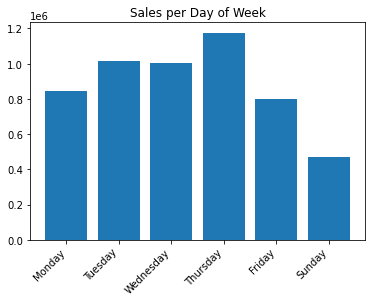

In [ ]:
results = df.groupby('WeekDay')['Quantity'].sum().sort_index()
days = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Sunday']


plt.bar(days, results.values)

plt.title('Sales per Day of Week')

plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

## Analyze the sales trends over time.
Identify the busiest months and days of the week in terms of sales.

### Combining Invoice in one column

In [ ]:
# 1. Select only duplicated invoices
df_dup = df[df['InvoiceNo'].duplicated(keep=False)]

# 2. Group Invoice Products in one column Grouped
df_dup['Grouped'] = df_dup.groupby('InvoiceNo')['StockCode'].transform(lambda x: ','.join(x.astype(str)))

# 3. Calculate Total of Invoice
df_dup['Total'] = df_dup.groupby('InvoiceNo')['SubTotal'].transform(lambda x: x.sum())

# 4. Calculate Total of Invoice
df_dup['TotalQuantity'] = df_dup.groupby('InvoiceNo')['Quantity'].transform(lambda x: x.sum())

# 5. Delete duplicated and keep only one
df_temp = df_dup.drop_duplicates(['InvoiceNo'])

In [ ]:
# Delete columns Quantity and UnitPrice
df_temp.drop(columns=['Quantity', 'UnitPrice'], axis=1, inplace=True)

# Rename column for future merge
df_temp.rename(columns={'TotalQuantity':'Quantity'}, inplace=True)

In [ ]:
# Get no duplicated invoices
df_nodup = df.drop_duplicates(['InvoiceNo'], keep=False)

#Group Invoice Products in one column Grouped
df_nodup['Grouped'] = df_nodup['StockCode']

#Calculate Total of Invoice
df_nodup['Total'] = df_nodup['SubTotal']

In [ ]:
#Join both dataFrames
df_invoices = pd.merge(df_nodup, df_temp, how='outer')

#Drop the unnecessary columns
df_invoices.drop(['UnitPrice', 'SubTotal'], axis=1, inplace=True)

In [ ]:
#Save invoices and cleaned data
df_invoices.to_csv("online_invoice.csv")

df.to_csv("online_retail_clean.csv")

In [ ]:
#Delete DataFrames

del df_nodup
del df_dup
del df_temp

### Busiest Month of 2011

In [ ]:
#Exclude returns from this
mask_2011 = (df_invoices['Year']==2011)

In [ ]:
# Get the Busiest Month of 2011

# 1. Filter the dataset by year 2011
# 2. Group the dataframe by 'Month'.
# 3. Calculate the sum of 'Quantity' and 'Total' for each group.

df_invoices[mask_2011].groupby(['Month'])[['Quantity','Total']].sum().sort_values('Quantity', ascending=False)

,Quantity,Total
Month,,
11,737773,1433884.990
10,597897,1063394.330
9,562883,1014355.681
8,409797,703075.640
7,395423,678538.531
5,391347,732763.510
6,381627,725651.040
3,372787,681340.640
1,307646,580616.110


In [ ]:
# Get the Busiest Days of the week

# 1. Group the dataframe by 'WeekDay'.
# 2. Calculate the sum of 'Quantity' for each group.

df.groupby(['WeekDay'])[['Quantity']].sum().sort_values('Quantity',ascending=False)

,Quantity
WeekDay,
3,1175922
1,1016504
2,1004294
0,843639
4,797458
6,467429


## Identify any outliers or anomalies in the dataset

### Otuliers en 'UnitPrice'

In [ ]:
df.sort_values('UnitPrice', ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Quarter,WeekDay,SubTotal
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.5,15098.0,United Kingdom,6,2011,2,4,649.5
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.5,15098.0,United Kingdom,6,2011,2,4,38970.0
118769,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-03-14 11:38:00,295.0,13452.0,United Kingdom,3,2011,1,0,295.0
205759,554836,22655,VINTAGE RED KITCHEN CABINET,1,2011-05-26 16:25:00,295.0,13015.0,United Kingdom,5,2011,2,3,295.0
82768,543253,22655,VINTAGE RED KITCHEN CABINET,1,2011-02-04 15:32:00,295.0,14842.0,United Kingdom,2,2011,1,4,295.0


In [ ]:
df.sort_values('Quantity', ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Quarter,WeekDay,SubTotal
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,12,2011,4,4,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,1,2011,1,1,77183.60
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,10,2011,4,3,1008.00
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,5,2011,2,4,3096.00
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom,2,2011,1,1,3202.92


In [ ]:
#Returns per Country
returns = df.query('Quantity <0').groupby('Country')['Quantity'].sum().reset_index().sort_values('Quantity')
returns.rename(columns={'Quantity':'Returns'}, inplace=True)

#Sales per Country
sales= df.query('Quantity > 0').groupby('Country')['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False)
sales.rename(columns={'Quantity':'Sales'}, inplace=True)


df_1 = sales.merge(returns, on='Country', how='left').fillna(0)
df_1['Total_sales'] = df_1['Sales'] - df_1['Returns']
df_1.sort_values('Total_sales', ascending=False)

,Country,Sales,Returns,Total_sales
0,United Kingdom,4654421,-258099.0,4912520.0
1,Netherlands,200258,-324.0,200582.0
2,EIRE,147168,-4802.0,151970.0
3,Germany,118139,-1798.0,119937.0
4,France,111272,-1579.0,112851.0
5,Australia,83900,-555.0,84455.0
6,Sweden,36042,-443.0,36485.0
7,Switzerland,30527,-300.0,30827.0
8,Spain,27731,-1124.0,28855.0
9,Japan,26016,-795.0,26811.0


from matplotlib import pyplot as plt
_df_2['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Returns'].plot(kind='hist', bins=20, title='Returns')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Total_sales'].plot(kind='hist', bins=20, title='Total_sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Sales', y='Returns', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Returns', y='Total_sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Returns'].plot(kind='line', figsize=(8, 4), title='Returns')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Total_sales'].plot(kind='line', figsize=(8, 4), title='Total_sales')
plt.gca().spines[['top', 'right']].set_visible(False)

## Explore the top-selling products and countries based on the quantity sold.

### Producto con más unidades vendidas

In [ ]:
# 1. Group the dataframe by 'StockCode'.
# 2. Calculate the sum of 'Quantity' for each group.
# 3. Reset the index to make 'StockCode' columns again.

best_products = df.groupby(['StockCode'])[['Quantity']] \
        .sum().sort_values('Quantity', ascending=False) \
        .reset_index().head()

# 4. Use the 'index' attribute of 'best_products' to get the indices.
# 5. Use the 'map' method to apply a lookup on 'df['Description']' using these indices.
# 6. Assign the resulting descriptions to the 'Description' column in 'best_products'.
best_products['Description'] = best_products.index.map(df['Description'])
best_products


,StockCode,Quantity,Description
0,22197,56450,WHITE HANGING HEART T-LIGHT HOLDER
1,84077,53847,WHITE METAL LANTERN
2,85099B,47359,CREAM CUPID HEARTS COAT HANGER
3,84879,36381,KNITTED UNION FLAG HOT WATER BOTTLE
4,21212,36039,RED WOOLLY HOTTIE WHITE HEART.


### Top 5 países con más ventas

In [ ]:
# Get the best country by quantity of purchases
# 1. Group the dataframe by 'Country'.
# 2. Calculate the sum of 'Quantity' for each group.
# 3. Get idxmax to print the first Country on the list

print("Best Country: ", df_invoices.groupby(['Country'])['Quantity'].sum().idxmax())

df_invoices.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False).head(5)

Best Country:  United Kingdom


Country
United Kingdom    4396322
Netherlands        199934
EIRE               142366
Germany            116341
France             109693
Name: Quantity, dtype: int64

### Cliente con más compras

In [ ]:
# Get the best buyer by quantity of purchases
# 1. Group the dataframe by 'CustomerID' and 'Country'.
# 2. Calculate the sum of 'Quantity' for each group.
# 3. Get idxmax to print the first Country on the list

print("Best buyer: ", df_invoices.groupby(['CustomerID', 'Country'])['Quantity'].sum().idxmax())

df_invoices.groupby(['CustomerID', 'Country'])[['Quantity']].sum() \
            .sort_values('Quantity', ascending=False) \
            .reset_index().head(5)

Best buyer:  (14646.0, 'Netherlands')


,CustomerID,Country,Quantity
0,14646.0,Netherlands,196556
1,12415.0,Australia,76946
2,14911.0,EIRE,76931
3,17450.0,United Kingdom,69041
4,18102.0,United Kingdom,64124


## Conclusions and findings from the EDA.

+ Los meses con más ventas (basado en Quantity) son Noviembre, Octubre y Septiembre
+ Los días de la semana con más ventas son Jueves, Martes y Miércoles
+ No se observan datos los sábados, lo cual es muy llamativo y evidencia falta de datos importantes.


+ Hay un notable decenso en las ventas de Diciembre comparado con el año anterior.
+ Los países que registran más ventas son: United Kingdom, Netherlands, EIRE (Ireland), Germany and France.
+ Hay una notable diferencia entre UK y los siguientes en la lista aunque el cliente con más compras pertenece a Netherlands, el cuarto en la lista procede de UK.

+ La mayor correlación entre las variables que encontramos es entre Quantity y Total, lo cual es esperable.
+ Sugerimos recolectar datos sobre satisfacción de usuarios.

### Author: Anastasia Livio, October 2024